
## <span style='background :pink' > Heart attack prediction and analysis</span>


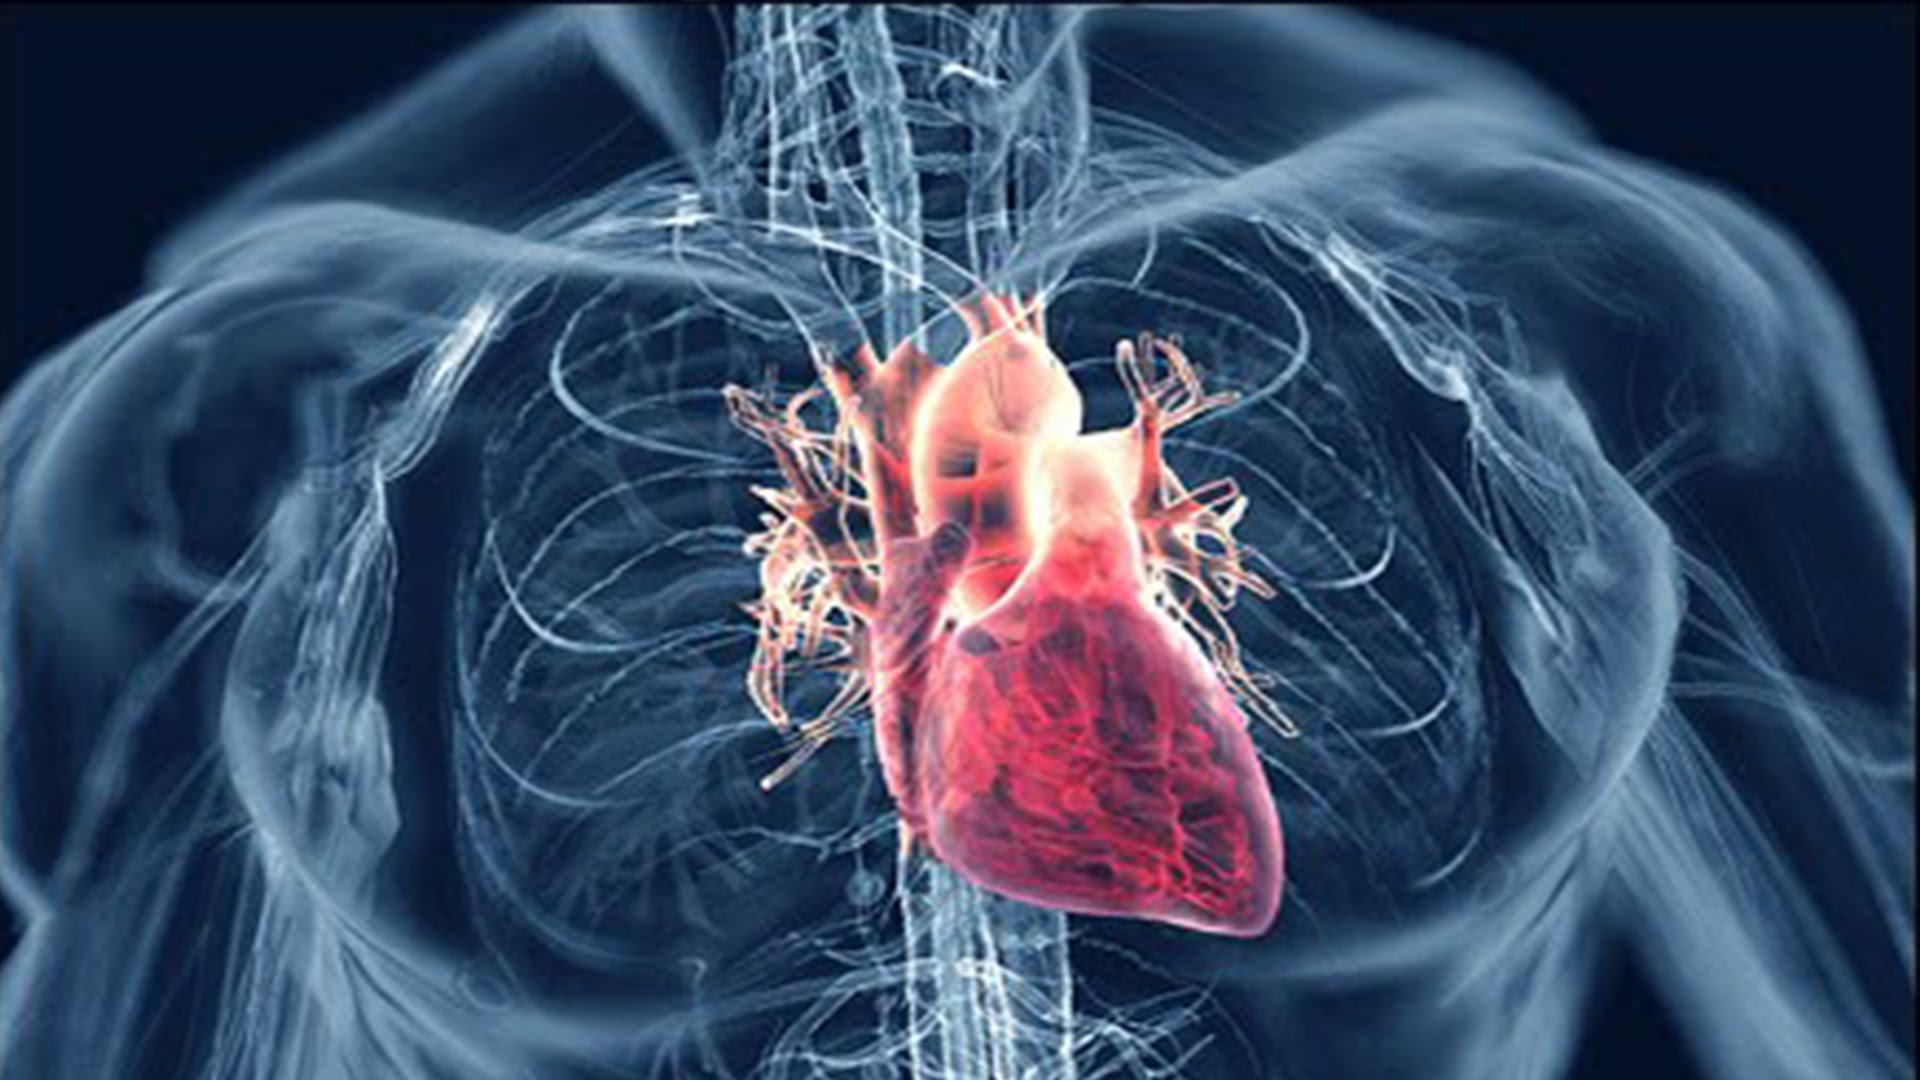


<h1 style="text-align: center">Importing </h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Definitions

### age - Age of the patient

### sex - Sex of the patient

### cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

### trtbps - Resting blood pressure (in mm Hg)

### chol - Cholestoral in mg/dl fetched via BMI sensor

### fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

### restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

### thalachh - Maximum heart rate achieved

### oldpeak - Previous peak

### slp - Slope

### caa - Number of major vessels

In [ ]:
Heart =pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')


## Understanding the data

In [ ]:
Heart= pd.DataFrame(Heart)
Heart.head()

In [ ]:
Heart.info

In [ ]:
Heart.shape

In [ ]:
Heart.info()

In [ ]:
Heart.dtypes

In [ ]:
Heart.columns.values

## Data Cleaning



In [ ]:
Heart.duplicated().sum()

In [ ]:
# We will drop the Duplicate value:
Heart=Heart.drop_duplicates(keep="first")

## outliers




In [ ]:
outliers=[]
def outliers_z_score(Heart):
    threshold = 3
    mean_y = np.mean(Heart)
    stdev_y = np.std(Heart)
    for i in Heart:
        z_score=(i-mean_y)/stdev_y
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
#thalachh feature
a=outliers_z_score(Heart.thalachh)
for i in a:     
    Heart['thalachh'].iloc[Heart[Heart.thalachh==i].index]=np.nan
#chol feature
b=outliers_z_score(Heart.chol)
for i in b:     
    Heart['chol'].iloc[Heart[Heart.chol==i].index]=np.nan
#oldpeak feature
c=outliers_z_score(Heart.oldpeak)
for i in c:
    Heart['oldpeak'].iloc[Heart[Heart.oldpeak==i].index]=np.nan
#imputing nan values
Heart['new_thalachh']=Heart.thalachh.fillna(Heart.thalachh.mean())
Heart['new_chol']=Heart.chol.fillna(Heart.chol.mean())
Heart['new_oldpeak']=Heart.oldpeak.fillna(Heart.oldpeak.mean())

In [ ]:
Heart.head()

In [ ]:
comparision_cols=np.where(Heart['oldpeak']== Heart['new_oldpeak'],True,False)
comparision_cols
count=np.count_nonzero(comparision_cols)
count

In [ ]:
Heart=Heart[~Heart['oldpeak'].isna()]

In [ ]:
Heart=Heart[~Heart['thalachh'].isna()]

In [ ]:
Heart=Heart[~Heart['chol'].isna()]

In [ ]:
Heart.info()

#### Now our Data is Clean We can do Further Analysis.

# Data visualization

##### Univariate

In [ ]:
sns.distplot(Heart['age'],kde = False)

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='age',data=Heart)

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(Heart['sex'].dropna(),kde=False,color='darkred',bins=40)


In [ ]:
sns.countplot(x='sex',data=Heart)

In [ ]:
Heart['cp'].hist(color='green',bins=40,figsize=(8,4))
plt.title("Chest pain type",fontsize=20)

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'trtbps', data = Heart, palette = 'magma')
plt.title('Resting blood pressure')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.title(" Cholestoral ",fontsize=20)
sns.countplot(x='chol',data=Heart)

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Fasting blood sugar",fontsize=20)
sns.distplot(Heart['fbs'])

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Resting electrocardiographic results",fontsize=20)
sns.distplot(Heart['restecg'].dropna(),bins=10)
plt.show()

In [ ]:

plt.figure(figsize=(15,10))
plt.title("Maximum heart rate achieved",fontsize=20)
sns.countplot(x='thalachh',data=Heart)
plt.show()

#### Bi variate

In [ ]:
sns.relplot(data=Heart, x="age", y="sex",hue='sex',col="slp", col_wrap=2)

In [ ]:
sns.relplot(data=Heart, x="sex", y="age",kind="line",ci=None)

In [ ]:
sns.barplot(x = 'sex', y = 'age', data =Heart,
            palette = 'PuRd')
plt.show()

In [ ]:
sns.pointplot(x="sex", y="cp", data=Heart)
plt.show()

In [ ]:

sns.regplot(x="age", y="cp", data=Heart)

In [ ]:
sns.jointplot(x='age', y='trtbps', data=Heart, kind='kde')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="age", y="fbs", data=Heart)

In [ ]:
Heart.plot.scatter(x= "age" ,y ="chol")

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(y="trtbps",x="age",data=Heart)

In [ ]:

sns.barplot(x='restecg', y='age', data=Heart)

In [ ]:
 
plt.figure(figsize=(17, 7))
sns.boxplot(x='thalachh',y='age',data=Heart,palette='winter')

### Multivariate

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="age",y="cp",hue="output",data=Heart)

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(Heart.corr());
plt.xticks(rotation=-45);


## Splitting the dataset into train and test

In [ ]:
X=Heart.iloc[:,0:13]
y=Heart.iloc[:,13]

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))

In [ ]:
scores=[]
for i in range(1,50):
    classifier =KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
    classifier.fit(X_train,y_train)
    scores.append(accuracy_score(y_test,classifier.predict(X_test)))
scores

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred =classifier.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
f1_score(y_test,y_pred)